In [27]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("project3.csv",sep=';')
df.columns=["PriceHub","TradeDate","WtdAvgPrice","Change","DailyVolumeMWh","NumberTrades","NumberCounterparties"]
df.drop(df.index[0],inplace=True)
df

,PriceHub,TradeDate,WtdAvgPrice,Change,DailyVolumeMWh,NumberTrades,NumberCounterparties
1,ABC,1/8/2001,135.50,10.00,400,1,2
2,ABC,1/12/2001,175.00,39.50,800,1,2
3,ABC,1/19/2001,325.00,150.00,400,1,2
4,ABC,1/26/2001,245.00,-80.00,400,1,2
5,ABC,2/12/2001,212.50,-32.50,800,2,3
...,...,...,...,...,...,...,...
3890,ABC,12/27/2016,25.86,-0.37,9200,22,15
3891,ABC,12/28/2016,25.53,-0.33,7200,18,12
3892,ABC,12/29/2016,23.63,-1.90,9600,12,9
3893,ABC,12/30/2016,33.39,9.76,7600,17,16


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 1 to 3894
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PriceHub              3894 non-null   object 
 1   TradeDate             3894 non-null   object 
 2   WtdAvgPrice           3894 non-null   float64
 3   Change                3893 non-null   float64
 4   DailyVolumeMWh        3894 non-null   int64  
 5   NumberTrades          3894 non-null   int64  
 6   NumberCounterparties  3894 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 243.4+ KB


In [30]:
df['TradeDate']=pd.to_datetime(df['TradeDate'],infer_datetime_format=True)
df = df.set_index(['TradeDate'])
df

,PriceHub,WtdAvgPrice,Change,DailyVolumeMWh,NumberTrades,NumberCounterparties
TradeDate,,,,,,
2001-01-08,ABC,135.50,10.00,400,1,2
2001-01-12,ABC,175.00,39.50,800,1,2
2001-01-19,ABC,325.00,150.00,400,1,2
2001-01-26,ABC,245.00,-80.00,400,1,2
2001-02-12,ABC,212.50,-32.50,800,2,3
...,...,...,...,...,...,...
2016-12-27,ABC,25.86,-0.37,9200,22,15
2016-12-28,ABC,25.53,-0.33,7200,18,12
2016-12-29,ABC,23.63,-1.90,9600,12,9


In [31]:
df.drop("PriceHub",axis=1,inplace=True)
df

,WtdAvgPrice,Change,DailyVolumeMWh,NumberTrades,NumberCounterparties
TradeDate,,,,,
2001-01-08,135.50,10.00,400,1,2
2001-01-12,175.00,39.50,800,1,2
2001-01-19,325.00,150.00,400,1,2
2001-01-26,245.00,-80.00,400,1,2
2001-02-12,212.50,-32.50,800,2,3
...,...,...,...,...,...
2016-12-27,25.86,-0.37,9200,22,15
2016-12-28,25.53,-0.33,7200,18,12
2016-12-29,23.63,-1.90,9600,12,9


In [42]:
df.index

DatetimeIndex(['2001-01-08', '2001-01-12', '2001-01-19', '2001-01-26',
               '2001-02-12', '2001-02-28', '2001-03-01', '2001-03-29',
               '2001-04-19', '2001-04-30',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-03'],
              dtype='datetime64[ns]', name='TradeDate', length=3894, freq=None)

In [48]:
def fun1(var):
    plt.figure(figsize  = (20,10))
    plt.plot(df[var])
    plt.xlabel("Date")
    plt.ylabel(var)

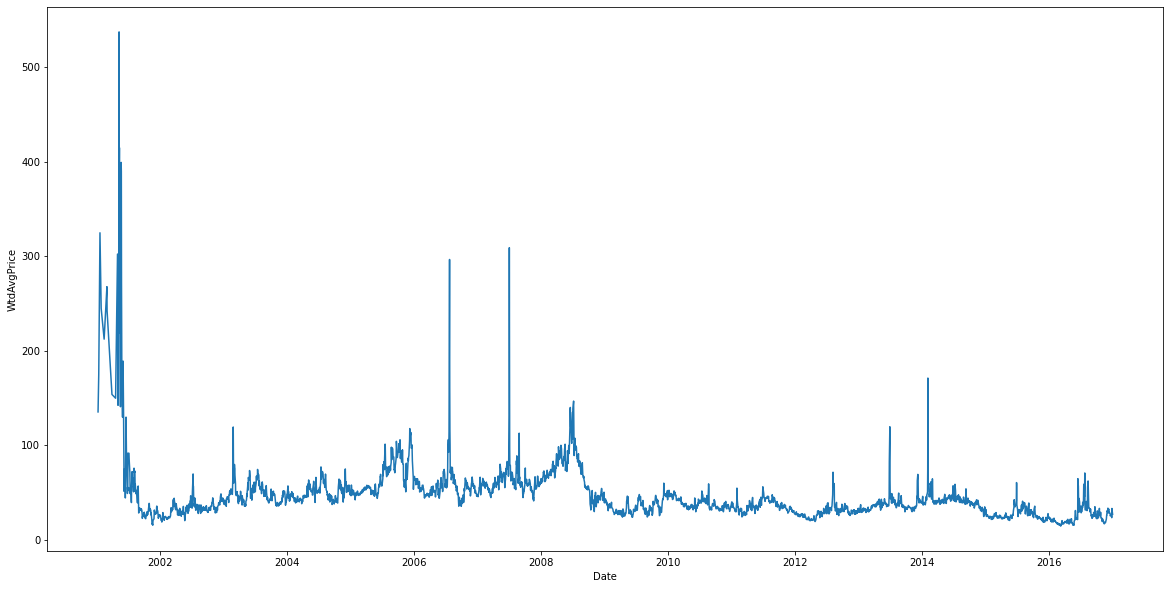

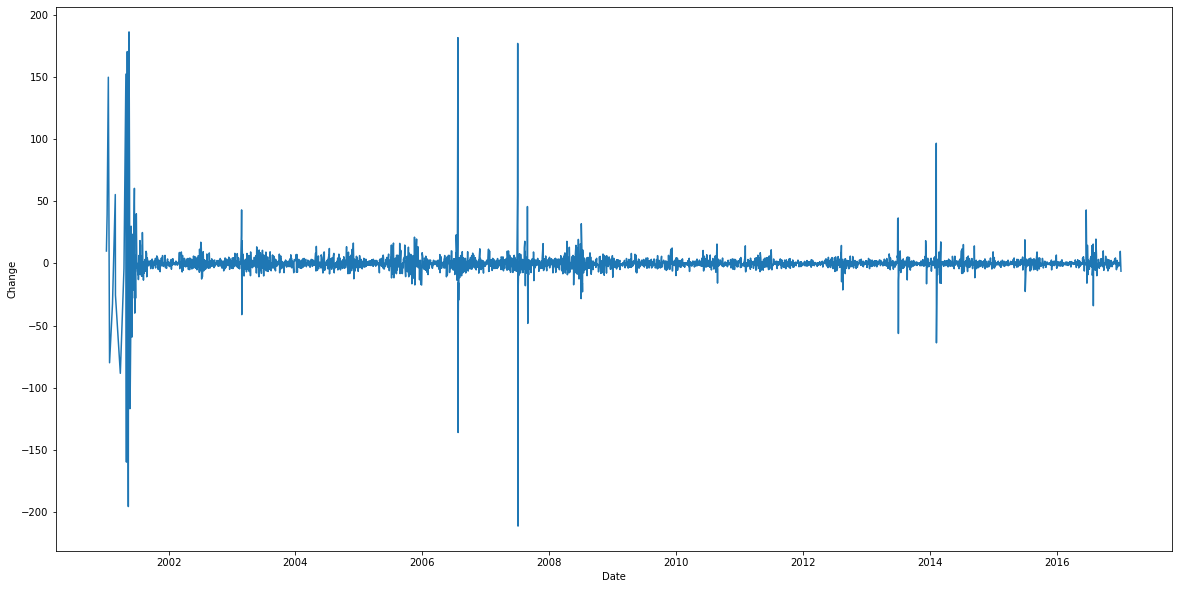

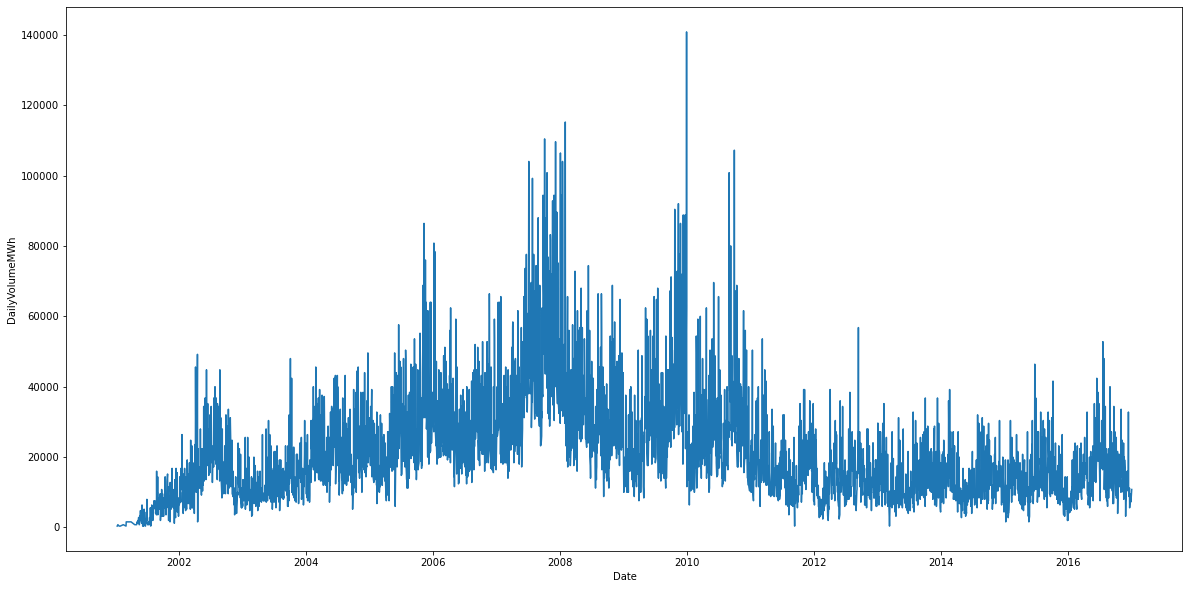

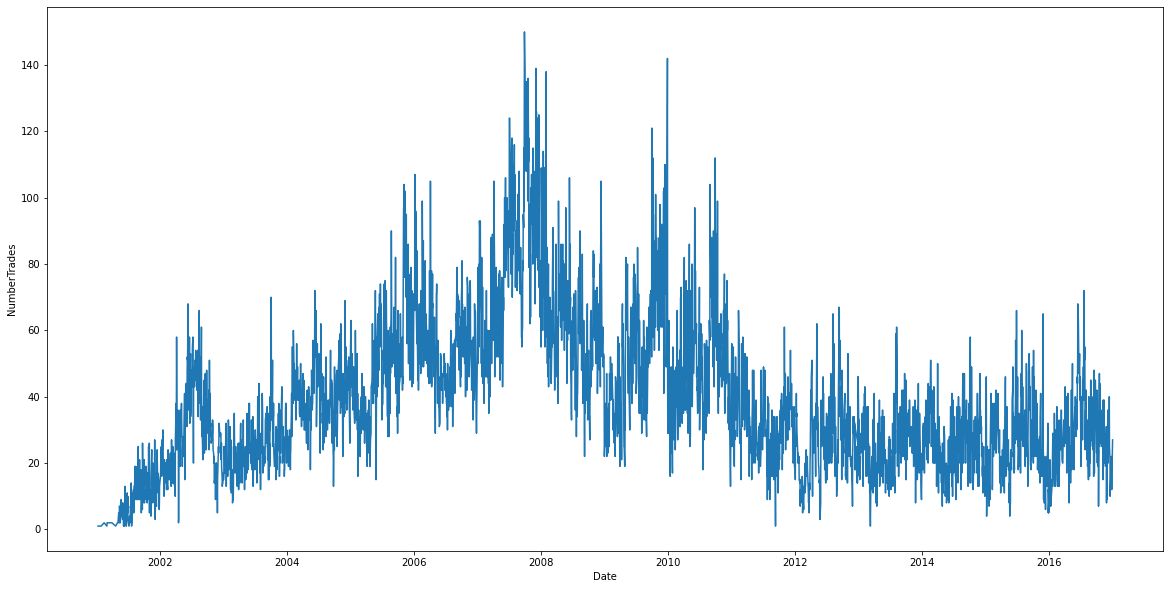

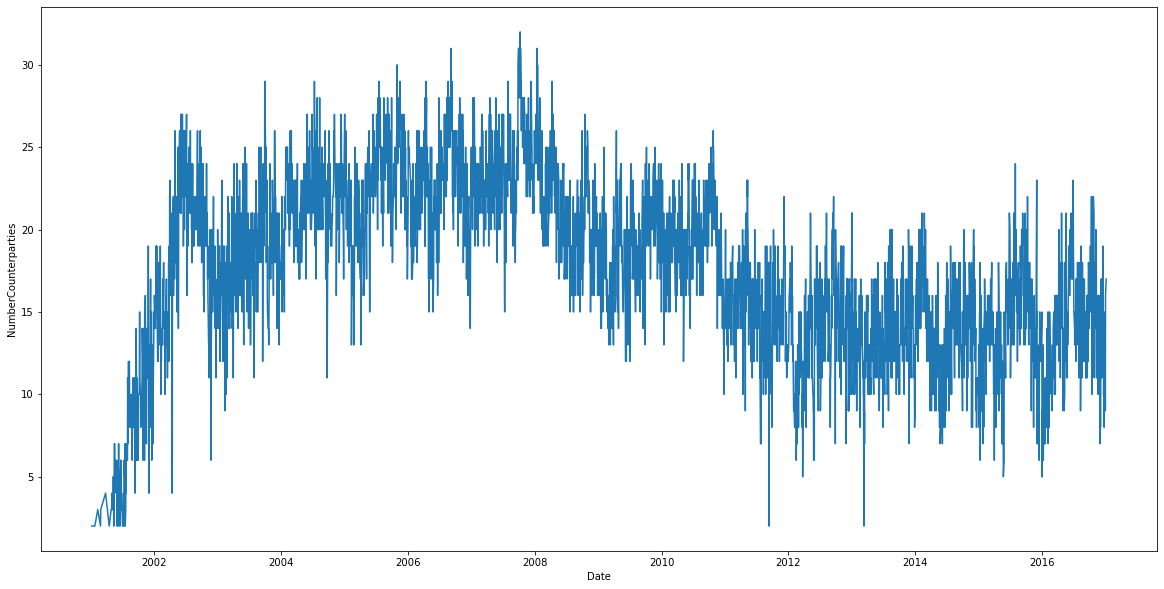

In [49]:
for x in df.columns:
    fun1(x)

In [53]:
df.isnull().sum()

WtdAvgPrice             0
Change                  1
DailyVolumeMWh          0
NumberTrades            0
NumberCounterparties    0
dtype: int64

In [54]:
df.dropna(inplace=True)

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
def fun2(var):
    decomposition = seasonal_decompose(df[var],model='additive',freq=10)
    plt.figure(figsize = (20,10))
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.subplot(411)
    plt.plot(df[var], label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()

<ipython-input-67-0183925c1a69>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df[var],model='additive',freq=10)


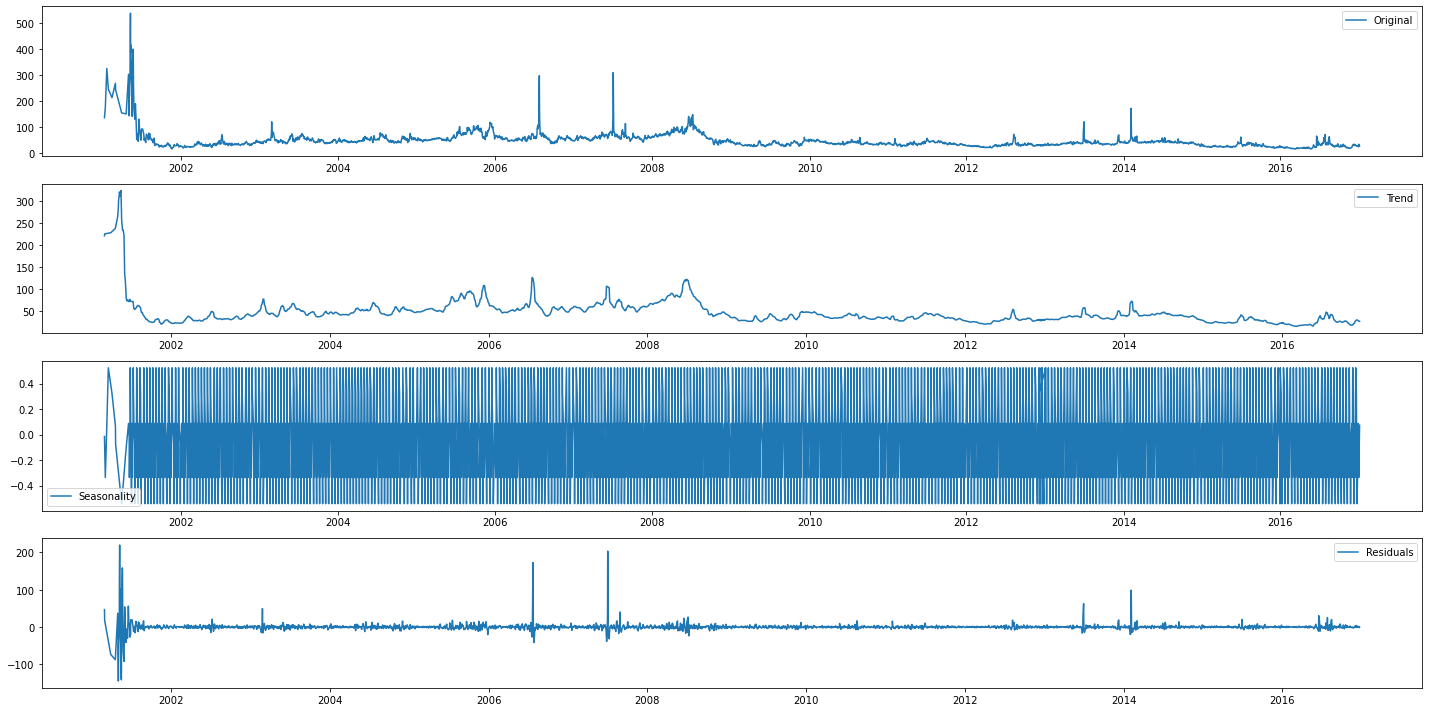

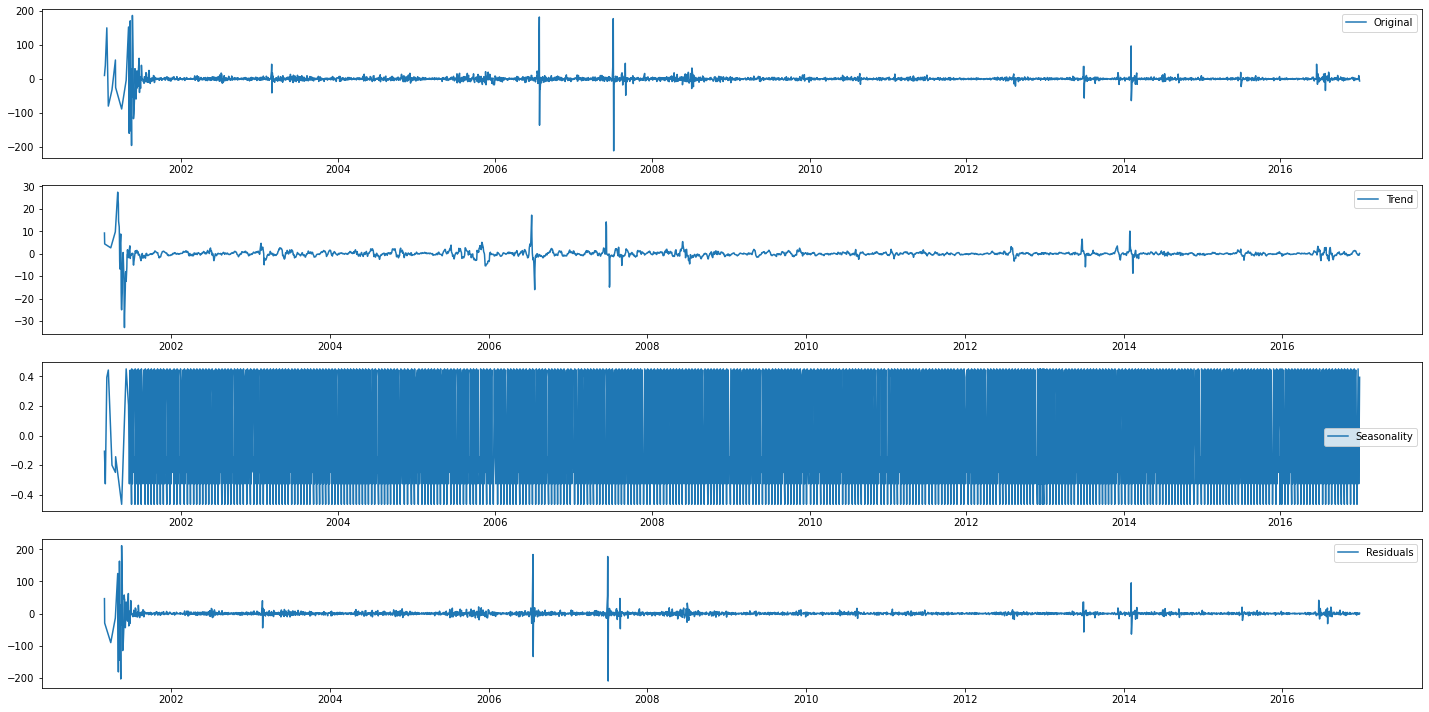

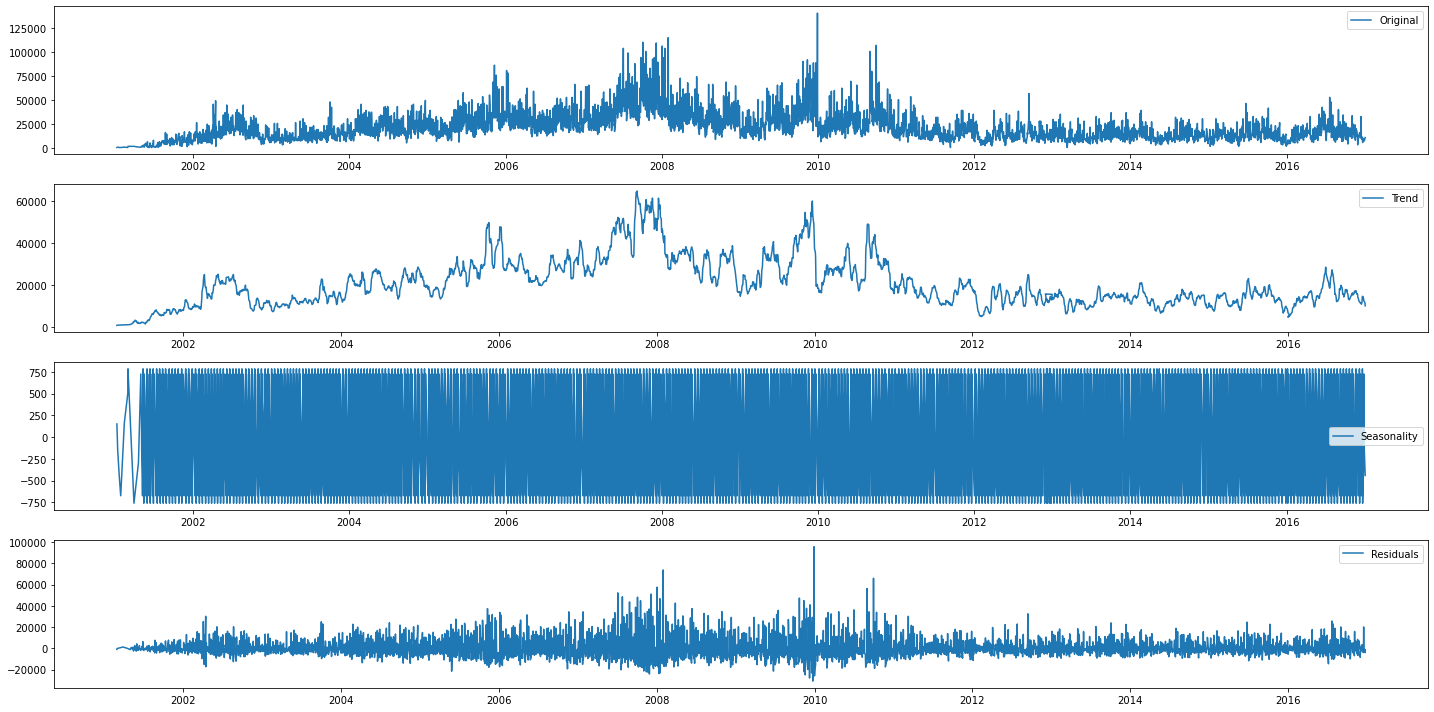

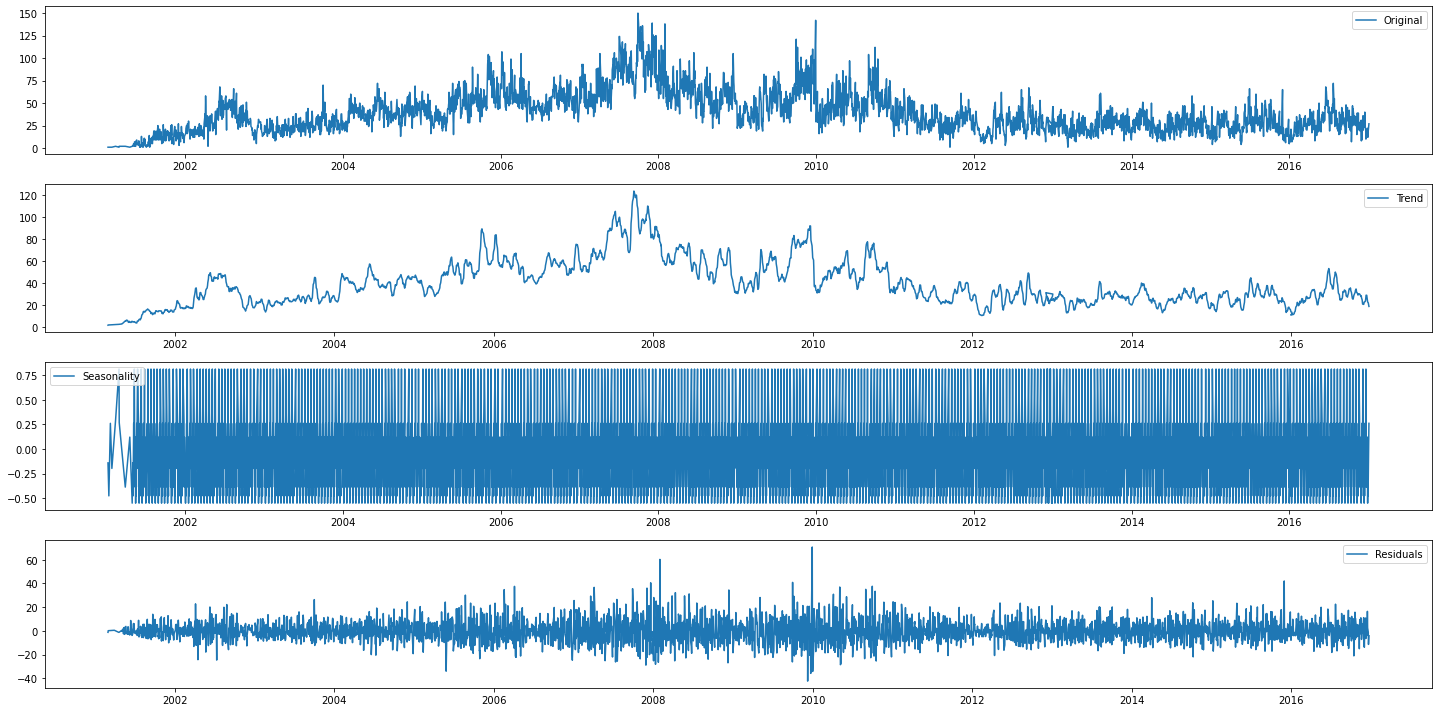

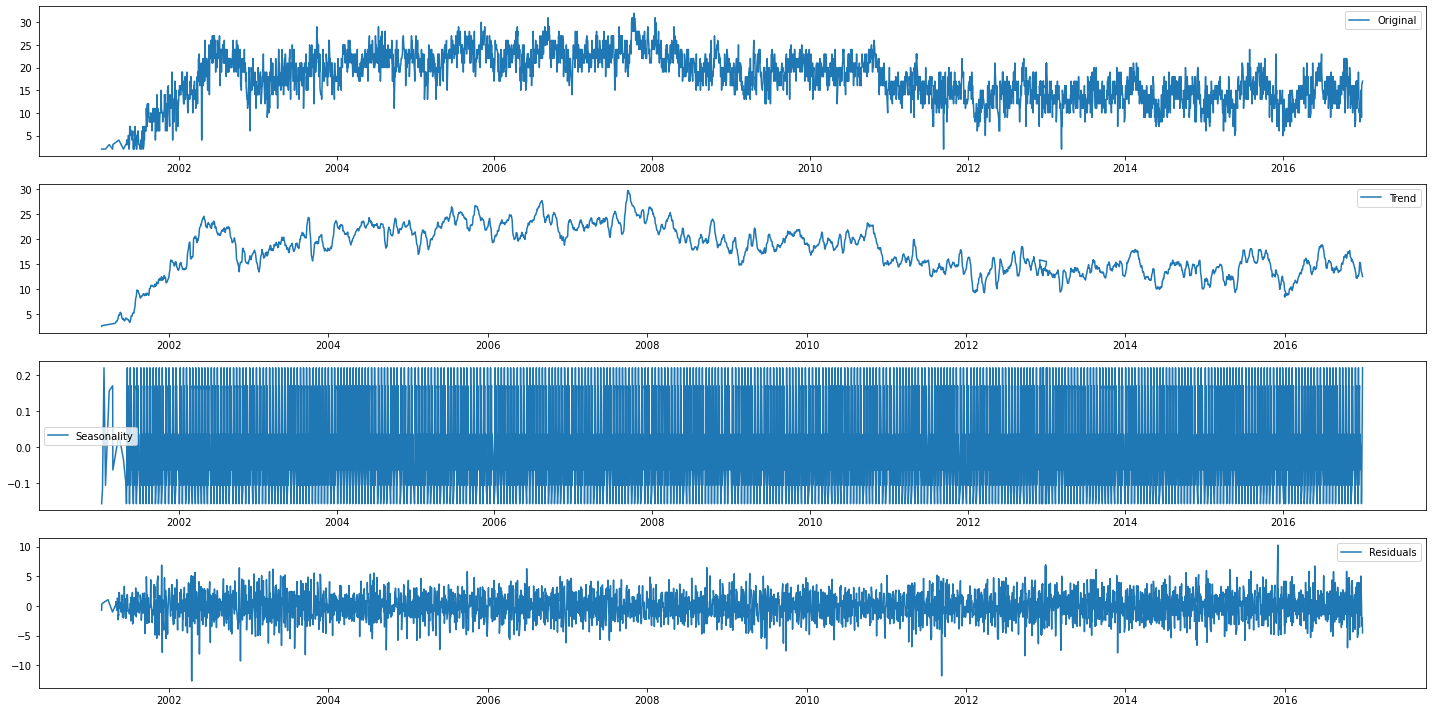

In [68]:
for x in df.columns:
    fun2(x)

In [71]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = df[timeseries].rolling(window = 7).mean()
    rolstd = df[timeseries].rolling(window = 7).std()

    #Plot rolling statistics:
    plt.figure(figsize = (20,10))
    orig = plt.plot(df[timeseries], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[timeseries], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

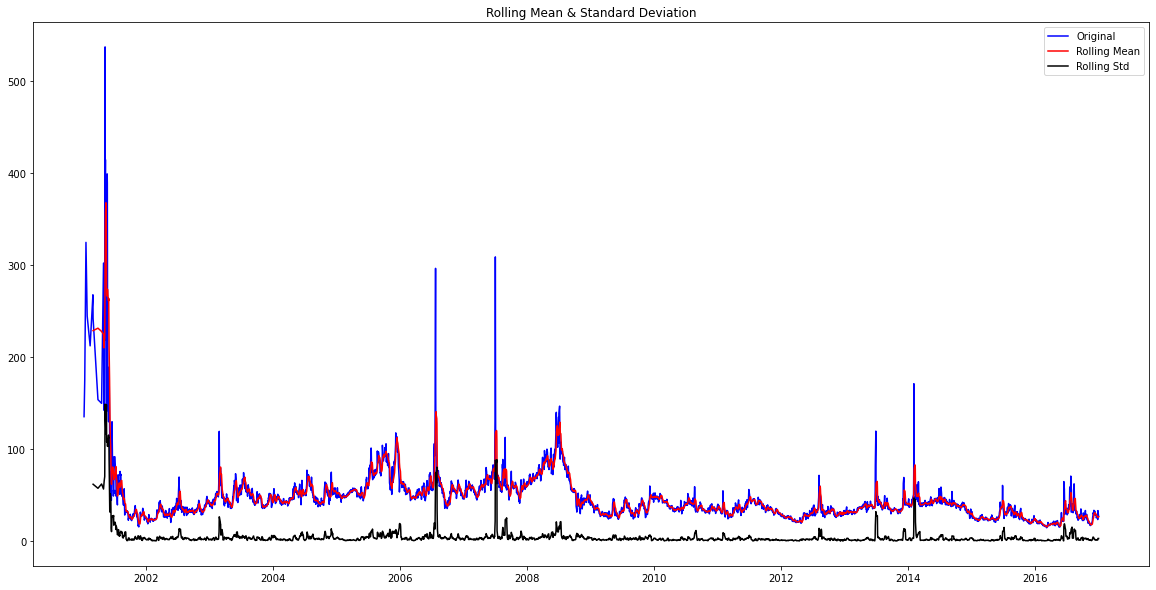

Results of Dickey-Fuller Test:
Test Statistic                -8.237017e+00
p-value                        5.852952e-13
#Lags Used                     2.900000e+01
Number of Observations Used    3.863000e+03
Critical Value (1%)           -3.432044e+00
Critical Value (5%)           -2.862288e+00
Critical Value (10%)          -2.567168e+00
dtype: float64


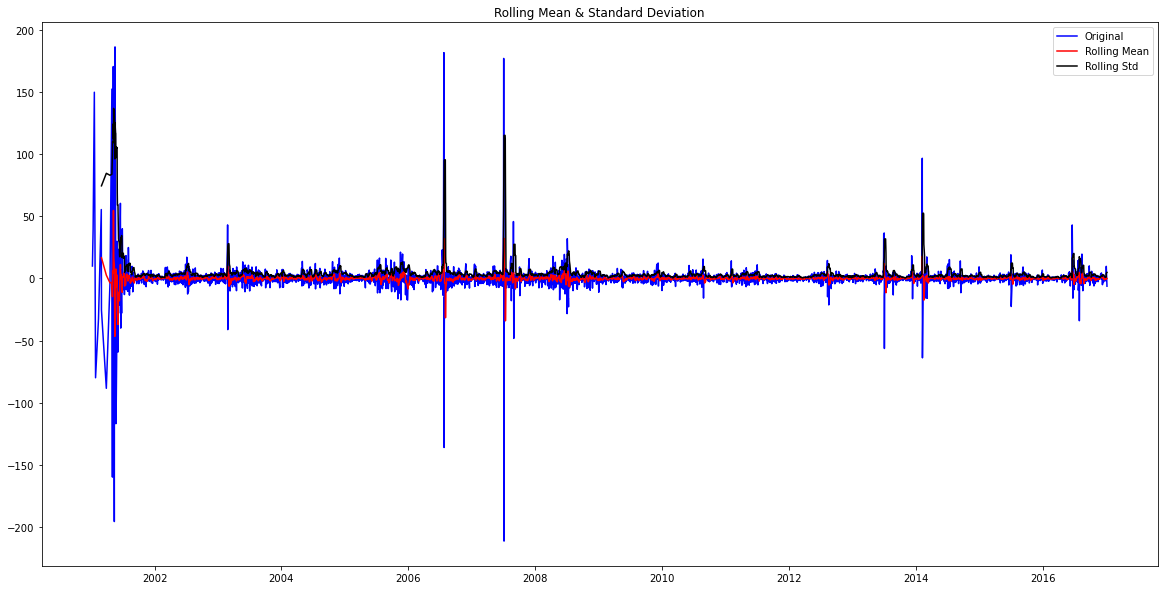

Results of Dickey-Fuller Test:
Test Statistic                -1.476451e+01
p-value                        2.374037e-27
#Lags Used                     2.800000e+01
Number of Observations Used    3.864000e+03
Critical Value (1%)           -3.432043e+00
Critical Value (5%)           -2.862288e+00
Critical Value (10%)          -2.567168e+00
dtype: float64


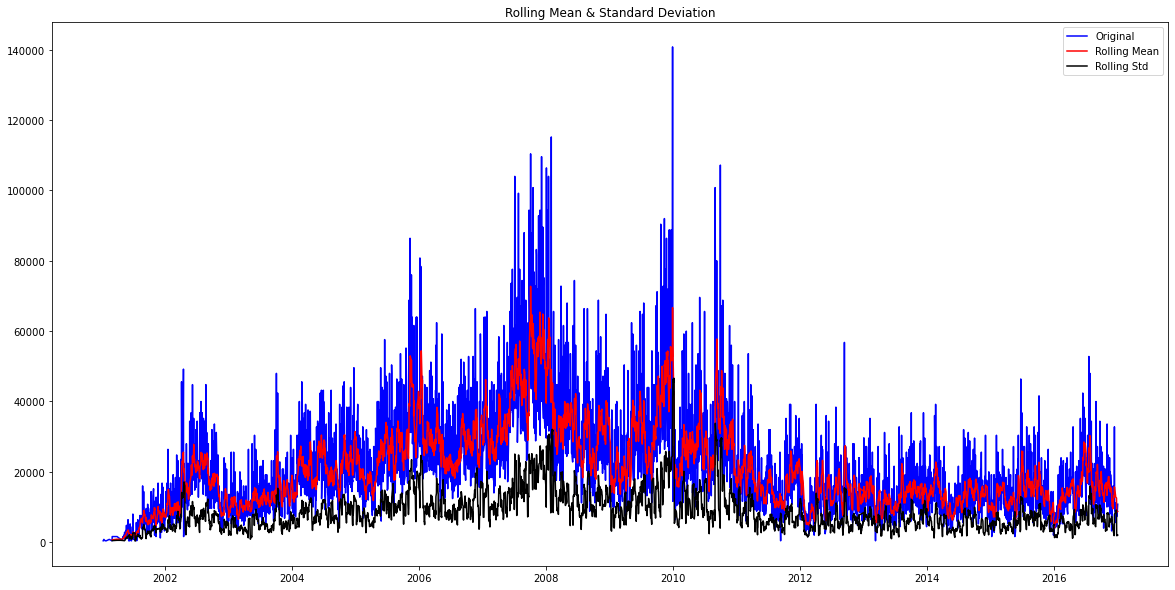

Results of Dickey-Fuller Test:
Test Statistic                   -3.576472
p-value                           0.006227
#Lags Used                       28.000000
Number of Observations Used    3864.000000
Critical Value (1%)              -3.432043
Critical Value (5%)              -2.862288
Critical Value (10%)             -2.567168
dtype: float64


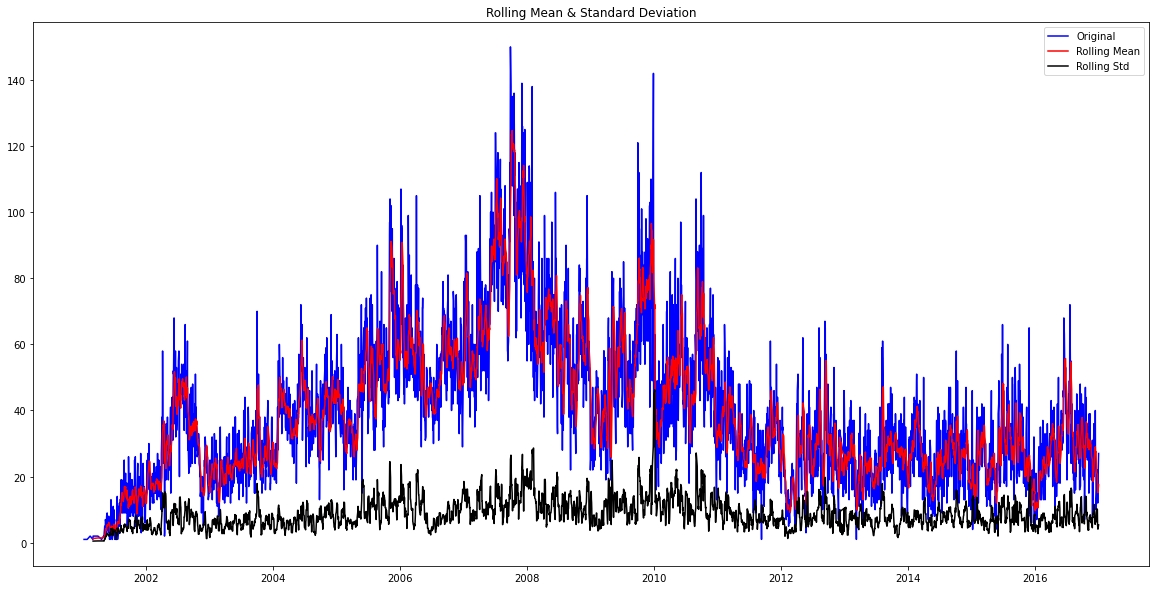

Results of Dickey-Fuller Test:
Test Statistic                   -3.456863
p-value                           0.009167
#Lags Used                       29.000000
Number of Observations Used    3863.000000
Critical Value (1%)              -3.432044
Critical Value (5%)              -2.862288
Critical Value (10%)             -2.567168
dtype: float64


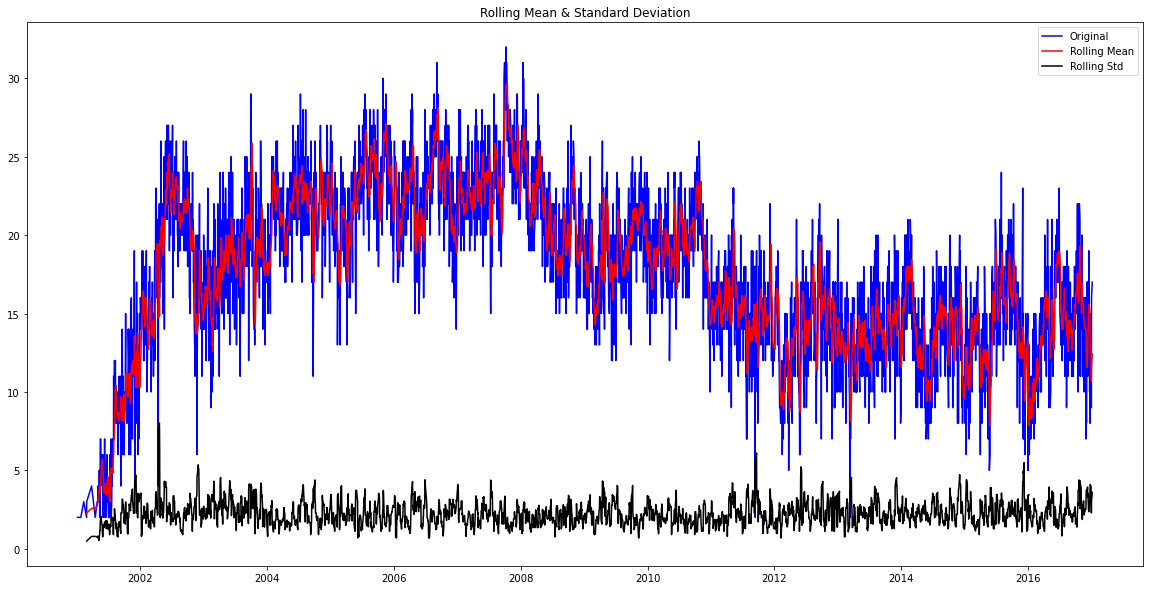

Results of Dickey-Fuller Test:
Test Statistic                   -3.513548
p-value                           0.007646
#Lags Used                       29.000000
Number of Observations Used    3863.000000
Critical Value (1%)              -3.432044
Critical Value (5%)              -2.862288
Critical Value (10%)             -2.567168
dtype: float64


In [72]:
for x in df.columns:
    test_stationarity(x)

# As I observed that for WtdAvgPrice the time series is sationary

In [106]:
dataset = df["WtdAvgPrice"]
dataset = dataset.to_frame()
dataset

,WtdAvgPrice
TradeDate,
2001-01-08,135.50
2001-01-12,175.00
2001-01-19,325.00
2001-01-26,245.00
2001-02-12,212.50
...,...
2016-12-27,25.86
2016-12-28,25.53
2016-12-29,23.63


            WtdAvgPrice
TradeDate              
2001-01-08       135.50
2001-01-12       175.00
2001-01-19       325.00
2001-01-26       245.00
2001-02-12       212.50
...                 ...
2016-12-27        25.86
2016-12-28        25.53
2016-12-29        23.63
2016-12-30        33.39
2017-01-03        27.14

[3893 rows x 1 columns]


C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

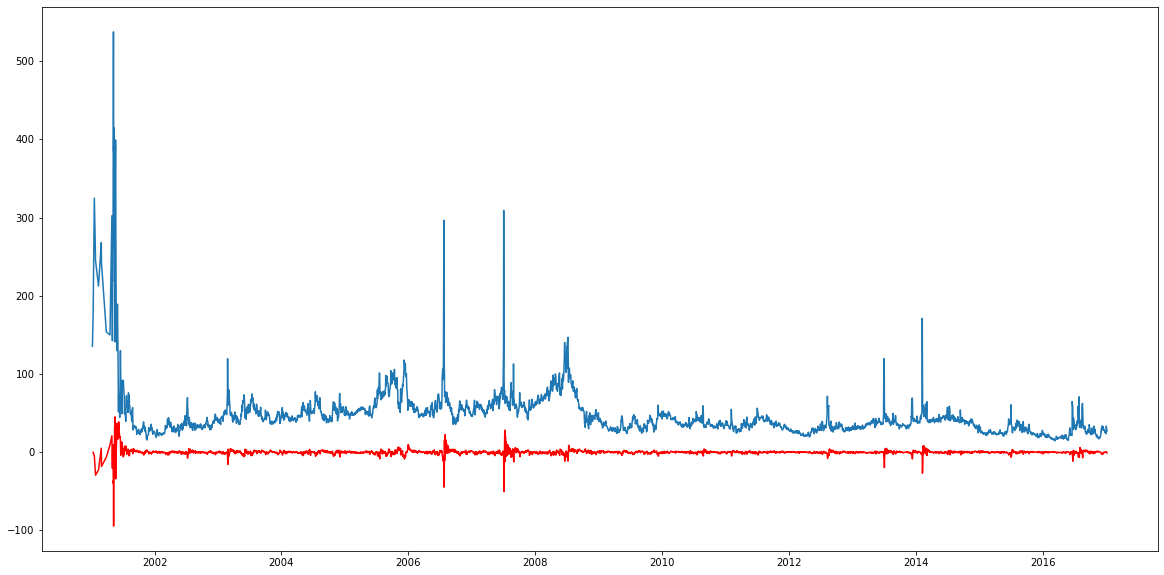

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
print(dataset)
decomposition = seasonal_decompose(dataset,period=30) 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dataset, order=(2,1,2))
results = model.fit(disp=-1)
plt.figure(figsize =  (20,10))
plt.plot(dataset)
plt.plot(results.fittedvalues, color='red')

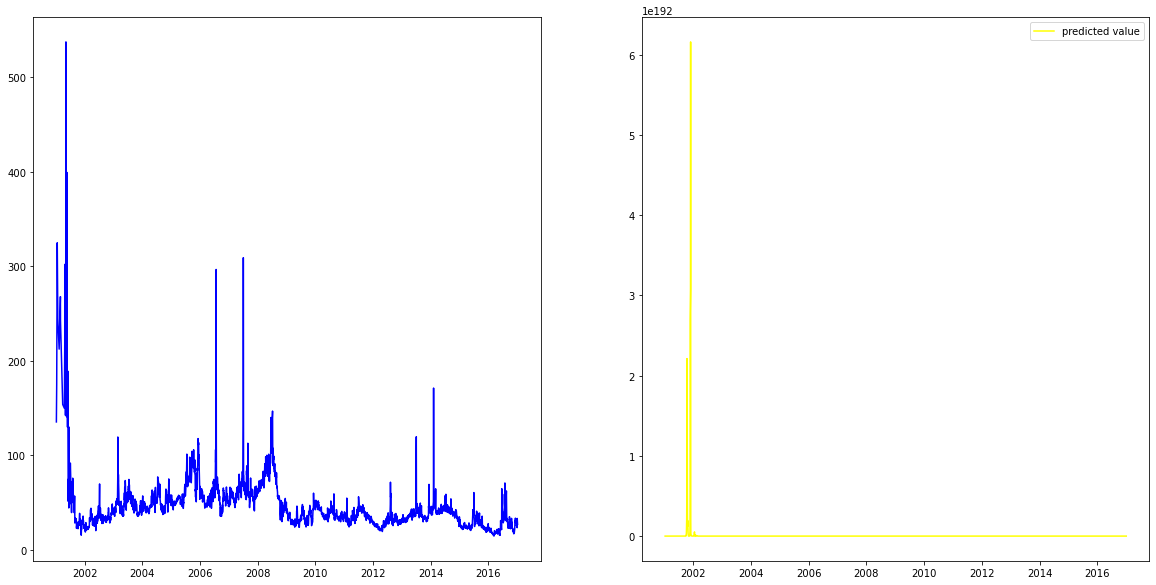

In [135]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dataset['WtdAvgPrice'].iloc[0], index=dataset.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1.plot(dataset,color='blue',label='Original value')
ax2.plot(predictions_ARIMA,color='yellow',label='predicted value')
plt.legend(loc='best')

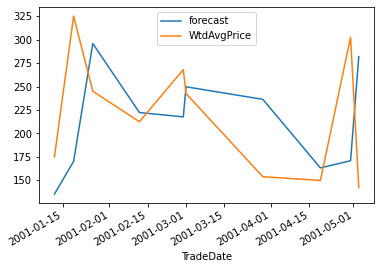

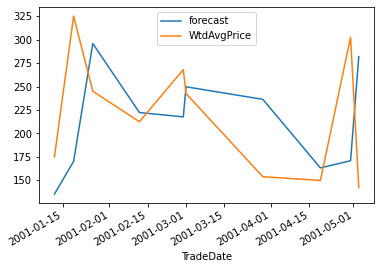

In [117]:
results.plot_predict(1,10)